In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df = df.drop('customerID', axis=1)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

        # change target to binary
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

        # split X and y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

for col in X.columns:
    if len(X[col].unique()) > 2 and X[col].dtype == 'object':
        X = pd.get_dummies(X, columns=[col], drop_first=True)
    elif  X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

for col in X.columns:
    if len(X[col].unique()) > 2:
        scaler = StandardScaler()  
        X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# change boolean columns to binary
for col in X_train.columns:
    if X_train[col].dtype == 'bool':
        X_train[col] = X_train[col].apply(lambda x: 1 if x == True else 0)
        X_test[col] = X_test[col].apply(lambda x: 1 if x == True else 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# print datatypes of X_train
print(X_train.dtypes)

(5634, 30) (1409, 30) (5634,) (1409,)
gender                                     int32
SeniorCitizen                              int64
Partner                                    int32
Dependents                                 int32
tenure                                   float64
PhoneService                               int32
PaperlessBilling                           int32
MonthlyCharges                           float64
TotalCharges                             float64
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No internet service

Table saved as table.jpg


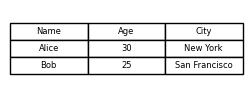